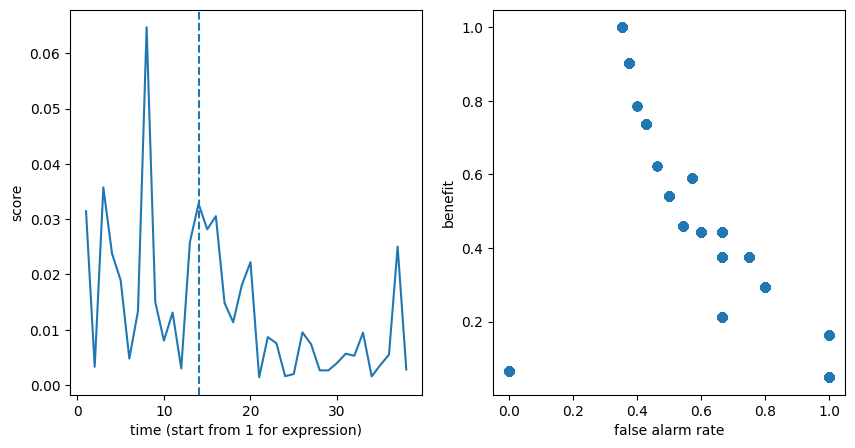

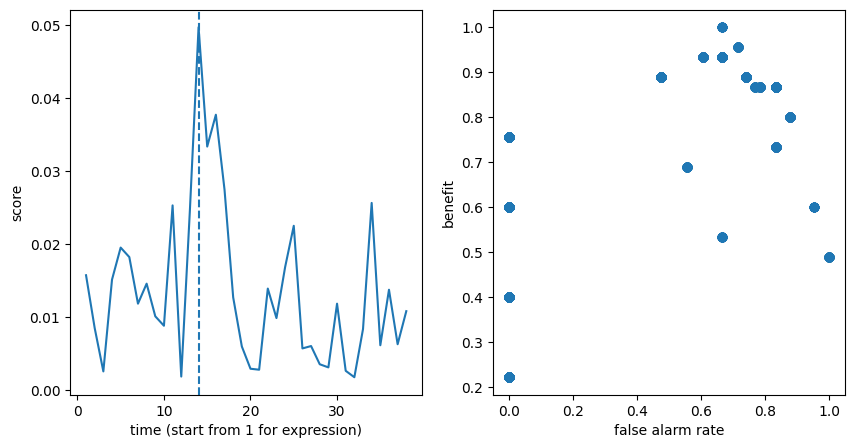

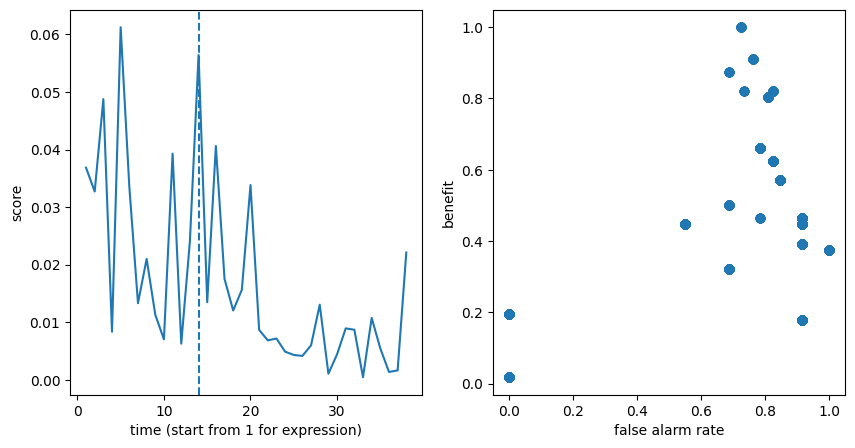

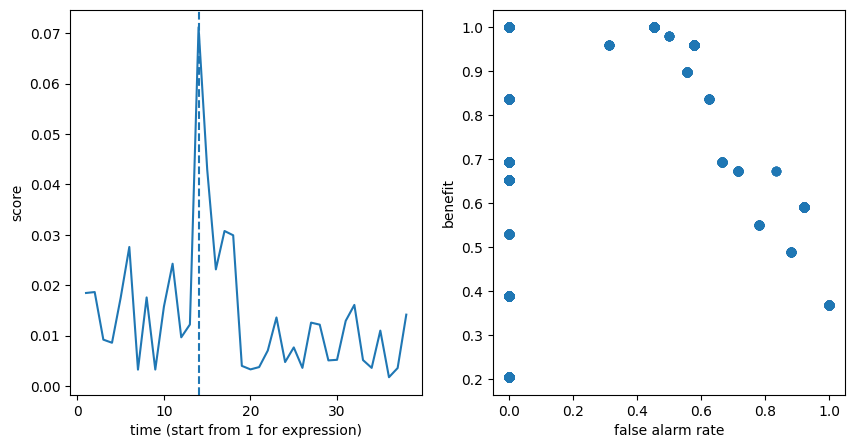

In [32]:
import numpy as np
import matplotlib.pyplot as plt

WINDOW_SIZE = 5
TORRANCE = 5
np.random.seed(seed=0)

def get_G1():
    matrix = np.zeros((6, 6))

    matrix[:3, :3] = np.random.choice([0, 1], size=(3, 3), p=[0.1, 0.9])
    matrix[3:, :3] = np.random.choice([0, 1], size=(3, 3), p=[0.9, 0.1])
    matrix[:3, 3:] = np.random.choice([0, 1], size=(3, 3), p=[0.9, 0.1])
    matrix[3:, 3:] = np.random.choice([0, 1], size=(3, 3), p=[0.8, 0.2])
    return matrix

def get_G2():
    matrix = np.zeros((6, 6))

    matrix[:3, :3] = np.random.choice([0, 1], size=(3, 3), p=[0.1, 0.9])
    matrix[3:, :3] = np.random.choice([0, 1], size=(3, 3), p=[0.9, 0.1])
    matrix[:3, 3:] = np.random.choice([0, 1], size=(3, 3), p=[0.9, 0.1])
    matrix[3:, 3:] = np.random.choice([0, 1], size=(3, 3), p=[0.2, 0.8])
    return matrix


for case in range(4):
    G1 = get_G1()
    graph_laplacian1 = np.diag(np.sum(G1, axis=1)) - G1

    _, s, _ = np.linalg.svd(graph_laplacian1)
    singular_vector = s.flatten()
    singular_vector = singular_vector / np.linalg.norm(singular_vector)

    context_matrix = singular_vector.reshape(-1, 1)

    score_history = []
    phase_history = []
    graph_history = [G1]

    for i in range(24):
        if context_matrix.shape[1] >= WINDOW_SIZE:
            context_matrix = context_matrix[:, -WINDOW_SIZE:]
        u, s, _ = np.linalg.svd(context_matrix)
        max_sv_index = np.argmax(s)
        max_left_singular_vector = u[:, 0]

        G1 = get_G1()
        graph_history.append(G1)
        graph_laplacian1 = np.diag(np.sum(G1, axis=1)) - G1

        _, s, _ = np.linalg.svd(graph_laplacian1)
        singular_vector = s.flatten()
        singular_vector = singular_vector / np.linalg.norm(singular_vector)

        similarity = np.dot(max_left_singular_vector, singular_vector)
        if similarity < 0:
            similarity = -similarity
        score = 1 - similarity

        # print("score: ", score)
        if i >  WINDOW_SIZE:
            score_history.append(score)
            phase_history.append(1)

        context_matrix = np.hstack([context_matrix, singular_vector.reshape(-1, 1)])


    for _ in range(25):
        if context_matrix.shape[1] >= WINDOW_SIZE:
            context_matrix = context_matrix[:, -WINDOW_SIZE:]
        u, s, _ = np.linalg.svd(context_matrix)
        max_sv_index = np.argmax(s)
        max_left_singular_vector = u[:, max_sv_index]

        G2 = get_G2()
        graph_history.append(G2)
        graph_laplacian2 = np.diag(np.sum(G2, axis=1)) - G2

        _, s, _ = np.linalg.svd(graph_laplacian2)
        singular_vector = s.flatten()
        singular_vector = singular_vector / np.linalg.norm(singular_vector)

        similarity = np.dot(max_left_singular_vector, singular_vector)
        if similarity < 0:
            similarity = -similarity
        score = 1 - similarity

        # print("score: ", score)
        score_history.append(score)
        phase_history.append(2)

        context_matrix = np.hstack([context_matrix, singular_vector.reshape(-1, 1)])

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].plot([idx for idx in range(1, len(score_history)+1, 1)], score_history)
    axes[0].set_xlabel("time (start from 1 for expression)")
    axes[0].set_ylabel("score")

    ANSWER = len(score_history) - 25
    axes[0].axvline(ANSWER+1, linestyle="--")


    b_delta_list = []
    f_delta_list = []
    for delta in np.arange(0.01, 1, 0.00001):
        total_benefit = 0
        detection_count = 0
        false_count = 0
        for i in range(len(score_history)):
            if score_history[i] > delta:
                benefit = 1 - abs(i - ANSWER) / TORRANCE
                total_benefit += benefit
                detection_count += 1
                if abs(i - ANSWER) > TORRANCE:
                    false_count += 1

        if detection_count > 0:
            b_delta_list.append(total_benefit)
            f_delta_list.append(false_count/ detection_count)

    axes[1].scatter(np.array(f_delta_list) / max(f_delta_list), np.array(b_delta_list) / max(b_delta_list))
    axes[1].set_xlabel("false alarm rate")
    axes[1].set_ylabel("benefit")

    # 保存用
    fig.savefig(f're_output{case+1}.png')


In [25]:
ANSWER

18

In [17]:
score_history[18]

0.04245871392780587

In [19]:
len(score_history) - 25

18

In [13]:
score_history

[1.1102230246251565e-16,
 1.1102230246251565e-16,
 1.1102230246251565e-16,
 1.1102230246251565e-16,
 1.1102230246251565e-16,
 1.1102230246251565e-16,
 1.1102230246251565e-16,
 1.1102230246251565e-16,
 1.1102230246251565e-16,
 1.1102230246251565e-16,
 1.1102230246251565e-16,
 1.1102230246251565e-16,
 1.1102230246251565e-16,
 1.1102230246251565e-16,
 1.1102230246251565e-16,
 1.1102230246251565e-16,
 1.1102230246251565e-16,
 1.1102230246251565e-16,
 0.04245871392780587,
 0.0039048192166484252,
 0.00981053227502171,
 0.007643160992831577,
 0.020391807278598906,
 0.010239182635133681,
 0.022937756246780072,
 0.02613146057108484,
 0.007361442714715394,
 0.007541063432699446,
 0.00460445075555882,
 0.0033683196797389403,
 0.008387648858445784,
 0.002570327492481539,
 0.0005812431623215542,
 0.005130327789466538,
 0.026191003464645868,
 0.00860348792325949,
 0.015210023761393354,
 0.007531149817274985,
 0.009092134834995158,
 0.004912963192466924,
 0.004513537430302583,
 0.006351013857058607,


In [9]:
test = graph_history[0]
for a in graph_history:
    print(np.all(a == test))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [2]:
graph_history

[array([[1., 1., 1., 0., 0., 1.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [0., 0., 0., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 1.]]),
 array([[1., 1., 1., 0., 0., 1.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [0., 0., 0., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 1.]]),
 array([[1., 1., 1., 0., 0., 1.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [0., 0., 0., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 1.]]),
 array([[1., 1., 1., 0., 0., 1.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [0., 0., 0., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 1.]]),
 array([[1., 1., 1., 0., 0., 1.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [0., 0., 0., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0.],
      